In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [20]:
data_path = 'multinaivebayes.csv'
data = pd.read_csv(data_path)
data

,Line Item Quantity Bins,Line Item Value Bins,Pack Price Bins,Unit Price Bins,Distance to Warehouse Bins,Delay Bins,Shipment Mode
0,0,2,4,1,3,2,Air_All
1,0,2,3,0,3,2,Ground_Sea
2,2,3,1,0,3,2,Ground_Sea
3,0,3,2,1,1,1,Air_All
4,0,1,1,0,3,2,Ground_Sea
...,...,...,...,...,...,...,...
6919,0,1,1,0,2,2,Air_All
6920,0,1,1,0,2,2,Air_All
6921,3,4,1,0,2,2,Air_All
6922,0,1,1,0,2,3,Ground_Sea


In [21]:
X = data.drop(columns='Shipment Mode')
y = data['Shipment Mode']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)


dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [22]:
y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy for decion tree: {accuracy}")
print("Classification Report:")
print(report)

Accuracy for decion tree: 0.7509025270758123
Classification Report:
              precision    recall  f1-score   support

     Air_All       0.79      0.84      0.81       904
  Ground_Sea       0.66      0.59      0.62       481

    accuracy                           0.75      1385
   macro avg       0.73      0.71      0.72      1385
weighted avg       0.75      0.75      0.75      1385



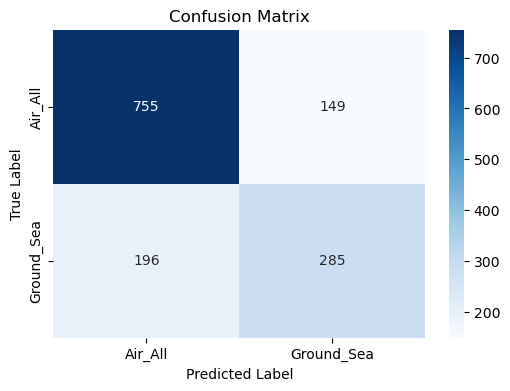

In [30]:
cm = confusion_matrix(y_test, y_pred, labels=dt_model.classes_)

cm_df = pd.DataFrame(cm, index=dt_model.classes_, columns=dt_model.classes_)

plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [24]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

print("\nSample of training data:")
display(X_train.head())

print("\nSample of testing data:")
display(X_test.head())

Training set shape: (5539, 6) (5539,)
Testing set shape: (1385, 6) (1385,)

Sample of training data:


,Line Item Quantity Bins,Line Item Value Bins,Pack Price Bins,Unit Price Bins,Distance to Warehouse Bins,Delay Bins
1480,3,4,1,0,2,2
5156,4,4,1,0,2,2
2249,3,4,1,0,3,3
2473,3,4,2,0,2,2
26,3,4,1,0,3,2



Sample of testing data:


,Line Item Quantity Bins,Line Item Value Bins,Pack Price Bins,Unit Price Bins,Distance to Warehouse Bins,Delay Bins
468,0,2,1,0,3,3
3821,4,4,2,1,3,1
3218,3,4,2,0,2,2
1315,4,4,1,0,3,2
1883,2,4,1,0,2,3


In [25]:
print("\nSample of training data:")
display(y_train.head())

print("\nSample of testing data:")
display(y_test.head())


Sample of training data:


1480    Ground_Sea
5156    Ground_Sea
2249       Air_All
2473    Ground_Sea
26      Ground_Sea
Name: Shipment Mode, dtype: object


Sample of testing data:


468     Ground_Sea
3821       Air_All
3218    Ground_Sea
1315       Air_All
1883       Air_All
Name: Shipment Mode, dtype: object

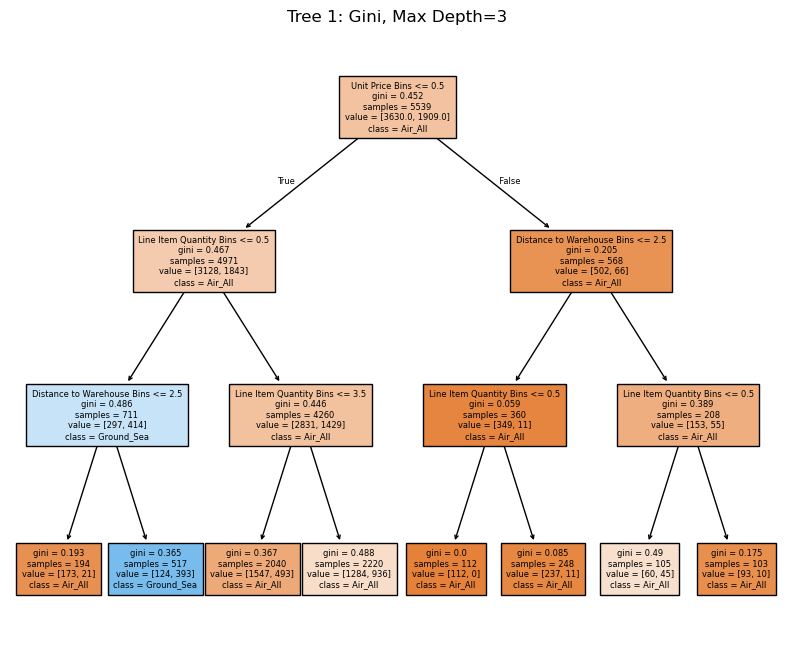

Root Node of Tree 1: Feature = Unit Price Bins, Threshold ≤ 0.50
Accuracy of Tree 1 on test set: 70.61%


In [26]:
dt1 = DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_split=2, random_state=42)
dt1.fit(X_train, y_train)
feature_names = X_train.columns

plt.figure(figsize=(10, 8))
plot_tree(dt1, feature_names=feature_names, class_names=dt1.classes_, filled=True,fontsize=6)
plt.title("Tree 1: Gini, Max Depth=3")
plt.show()

root_feature_1 = feature_names[dt1.tree_.feature[0]]
root_threshold_1 = dt1.tree_.threshold[0]

y_pred_1 = dt1.predict(X_test)
accuracy_1 = accuracy_score(y_test, y_pred_1)

print(f"Root Node of Tree 1: Feature = {root_feature_1}, Threshold ≤ {root_threshold_1:.2f}")
print(f"Accuracy of Tree 1 on test set: {accuracy_1:.2%}")

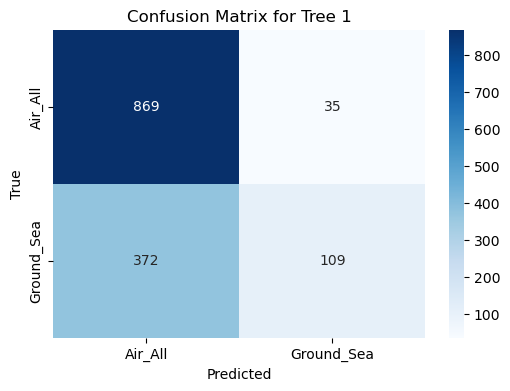

In [31]:
conf_matrix = confusion_matrix(y_test, y_pred_1)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=dt1.classes_, yticklabels=dt1.classes_)
plt.title('Confusion Matrix for Tree 1')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


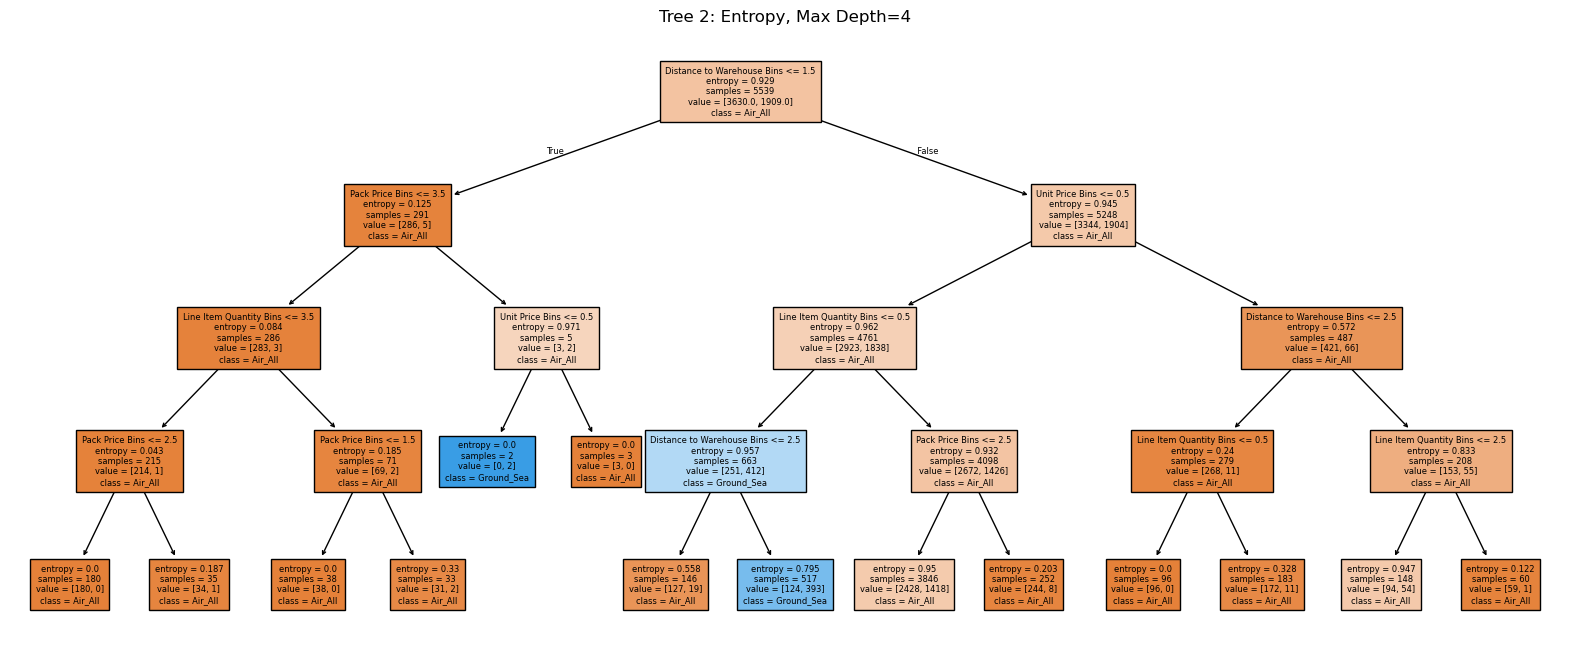

Root Node of Tree 2: Feature = Distance to Warehouse Bins, Threshold ≤ 1.50
Accuracy of Tree 2 on test set: 70.69%


In [34]:
dt2 = DecisionTreeClassifier(criterion="entropy", max_depth=4, min_samples_split=4, random_state=42)
dt2.fit(X_train, y_train)

plt.figure(figsize=(20,8))
plot_tree(dt2, feature_names=feature_names, class_names=dt2.classes_, filled=True,fontsize=6)
plt.title("Tree 2: Entropy, Max Depth=4")
plt.show()

root_feature_2 = feature_names[dt2.tree_.feature[0]]
root_threshold_2 = dt2.tree_.threshold[0]

y_pred_2 = dt2.predict(X_test)
accuracy_2 = accuracy_score(y_test, y_pred_2)

print(f"Root Node of Tree 2: Feature = {root_feature_2}, Threshold ≤ {root_threshold_2:.2f}")
print(f"Accuracy of Tree 2 on test set: {accuracy_2:.2%}")

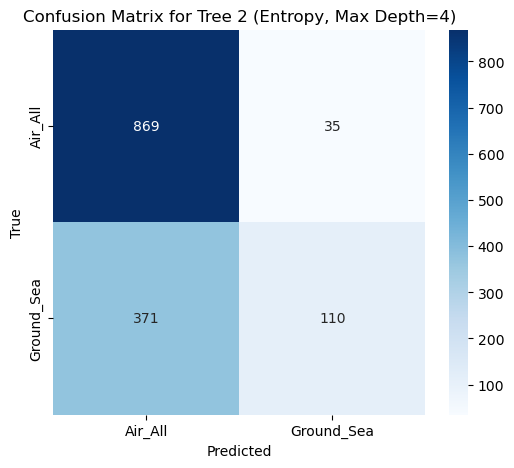

In [35]:
conf_matrix_2 = confusion_matrix(y_test, y_pred_2)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_2, annot=True, fmt='d', cmap='Blues', xticklabels=dt2.classes_, yticklabels=dt2.classes_)
plt.title('Confusion Matrix for Tree 2 (Entropy, Max Depth=4)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

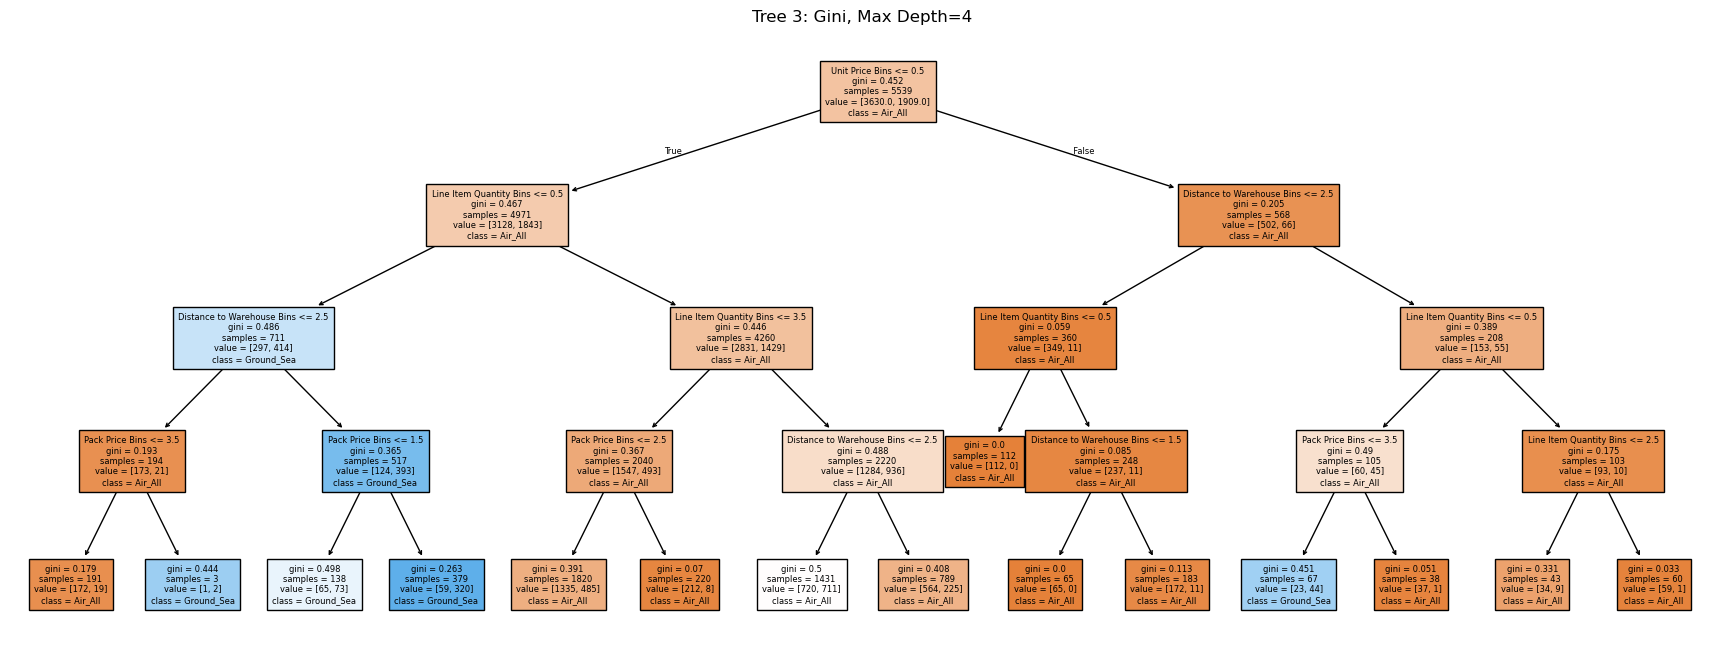

Root Node of Tree 3: Feature = Unit Price Bins, Threshold ≤ 0.50
Accuracy of Tree 3 on test set: 70.76%


In [37]:
dt3 = DecisionTreeClassifier(criterion="gini", max_depth=4, min_samples_split=5, random_state=42)
dt3.fit(X_train, y_train)

plt.figure(figsize=(22, 8))
plot_tree(dt3, feature_names=feature_names, class_names=dt3.classes_, filled=True,fontsize=6)
plt.title("Tree 3: Gini, Max Depth=4")
plt.show()

root_feature_3 = feature_names[dt3.tree_.feature[0]]
root_threshold_3 = dt3.tree_.threshold[0]

y_pred_3 = dt3.predict(X_test)
accuracy_3 = accuracy_score(y_test, y_pred_3)

print(f"Root Node of Tree 3: Feature = {root_feature_3}, Threshold ≤ {root_threshold_3:.2f}")
print(f"Accuracy of Tree 3 on test set: {accuracy_3:.2%}")

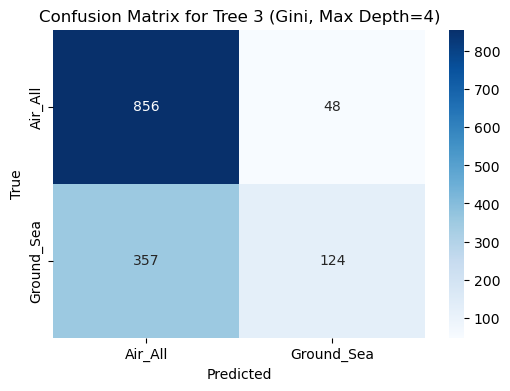

In [39]:
conf_matrix_3 = confusion_matrix(y_test, y_pred_3)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_3, annot=True, fmt='d', cmap='Blues', xticklabels=dt3.classes_, yticklabels=dt3.classes_)
plt.title('Confusion Matrix for Tree 3 (Gini, Max Depth=4)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
